# Einleitung zur Übung: “Sensor Sensitivity”

In dieser Übung untersuchen wir, wie Umweltfaktoren wie Temperatur, Luftfeuchtigkeit und Druck die Genauigkeit von CO₂-Messungen beeinflussen. Moderne Sensoren wie der GMP343 kompensieren diese Einflüsse mithilfe integrierter Algorithmen: Die Temperatur wird automatisch durch einen internen Sensor berücksichtigt, während weitere Umgebungsparameter wie Luftfeuchtigkeit, Druck oder Sauerstoffkonzentration über externe Sensoren gemessen und dem GMP343 bereitgestellt werden.

Unser Ziel ist es, Werkzeuge kennenzulernen, mit denen sich diese Umwelteinflüsse sichtbar machen und bewerten lassen.

## Hintergrund und Motivation

Die Präzision von Sensorsystemen hängt stark von Umwelteinflüssen ab. Um valide Messwerte zu erhalten, müssen diese Einflüsse erkannt und kompensiert werden – oft individuell für jeden Sensor.

Denn selbst Sensoren desselben Typs können aufgrund von Fertigungs- und Materialunterschieden sowie mechanischer Toleranzen unterschiedliche Sensitivitäten aufweisen. Das bedeutet: Die Reaktion auf Temperatur, Druck oder Luftfeuchtigkeit variiert von Sensor zu Sensor.

In [1]:
import polars as pl
import os
import sys
import numpy as np

# Add the parent directory to the system path
PROJECT_PATH = os.path.abspath(os.path.join(".."))

if PROJECT_PATH not in sys.path:
    sys.path.append(PROJECT_PATH)
    
from utils.plot_series import plot_histogram_with_stats
from utils.plot_dataframes import plot_columns
from utils.plot_sensitivities import plot_scatter_with_trendline

In [2]:
df_sbs_2025 = pl.read_parquet("../data/3_Sensor_Sensitivity/2025_Sensor_GMP343_Measurement.parquet")
df_3 = df_sbs_2025.filter(pl.col("system_id") == 3)
df_6 = df_sbs_2025.filter(pl.col("system_id") == 6)

df_sbs_2024 = pl.read_parquet("../data/3_Sensor_Sensitivity/2024_Sensor_GMP343_Measurement.parquet")

# Analyse von zwei Systemen zur gleichen Zeit am gleichen Ort

Nachfolgend betrachten wir stündlich aggreierte Mittelwerte für die System 3 & 6. 

shape: (2, 4)
┌───────────┬───────────┬──────────┬──────────┐
│ system_id ┆ MEAN      ┆ MAE      ┆ RMSE     │
│ ---       ┆ ---       ┆ ---      ┆ ---      │
│ i32       ┆ f64       ┆ f64      ┆ f64      │
╞═══════════╪═══════════╪══════════╪══════════╡
│ 3         ┆ 0.376829  ┆ 0.498575 ┆ 0.604028 │
│ 6         ┆ -0.591404 ┆ 0.735412 ┆ 0.898637 │
└───────────┴───────────┴──────────┴──────────┘


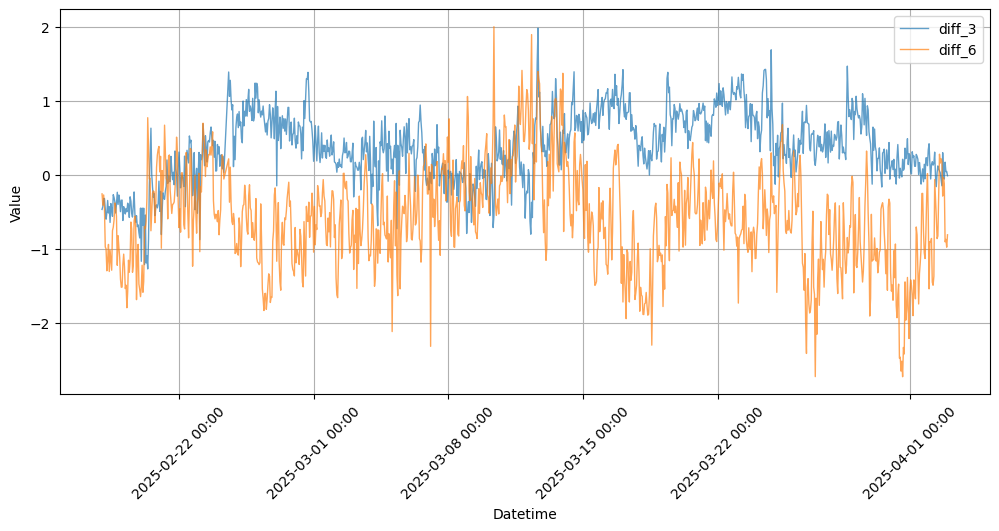

In [3]:
df_plot = df_3.select("datetime", "diff").join(df_6.select("datetime", "diff"), on="datetime", how="inner", suffix="_6").rename({"diff": "diff_3"})

print(df_sbs_2025.group_by(["system_id"]) \
    .agg([
            (pl.col("diff").mean()).alias("MEAN"),
            (np.abs(pl.col("diff"))).mean().alias("MAE"),
            (pl.col("diff").pow(2).mean().sqrt()).alias("RMSE")
        ]) \
    .sort("system_id"))

plot_columns(df_plot, "datetime", ["diff_3", "diff_6"])

# 🧪 Praktische Übung 1

In dieser Übung lernst du eine alternative Möglichkeit kennen, Datenverteilungen darzustellen: Histogramme.

- Ein Histogramm ist eine Visualisierung der Häufigkeitsverteilung numerischer Daten. Die x-Achse zeigt dabei Wertebereiche (sogenannte Bins), die y-Achse gibt an, wie viele Werte in jeden Bereich fallen.
- Die Bin Size (Breite der Intervalle) beeinflusst die Darstellung stark: Ist sie zu klein, wirkt das Histogramm unruhig; ist sie zu groß, können wichtige Details verloren gehen. Daher ist es sinnvoll, verschiedene Bin-Größen auszuprobieren.
- Zusätzlich betrachten wir zwei wichtige statistische Kenngrößen:
  - Standardabweichung (Std) misst die durchschnittliche Abweichung der Werte vom Mittelwert –> ein Maß für die Breite der Streuung.
  - Varianz (Var) ist das Quadrat der Standardabweichung –> ein Maß für die stärke der Streuung.

⸻

✅ Aufgabe:

1.	Erstelle ein Histogramm indem du die Spalten diff_3 und diff_6 als Polar-Series für die Funktion als passenden Input umwandelst
2.	Ändere die Bin Size, um eine geeignete, aussagekräftige Darstellung der Verteilung zu finden.
3.	Achte dabei auf Mittelwert, Varianz und Standardabweichung – sie helfen dir, die Streuung der Daten besser zu interpretieren.

### Nützliche Funktionen
- [Polars Transform: Dataframe -> Series](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.get_column.html#polars.DataFrame.get_column)

Eine Polars Series ist eine 1-dimensionale Datenstruktur, die eine Spalte eines DataFrames repräsentiert. Sie ist eine Liste an Datenwerte, die über praktische Funktionen in der Polars-Bibliothek weiter verarbeitet werden können. Eine Series kann aus verschiedenen Datentypen bestehen, darunter Ganzzahlen, Fließkommazahlen, Strings und mehr.

```Python
import polars as pl

# Beispiel für die Umwandlung einer DataFrame-Spalte in eine Series 
df = pl.DataFrame({
    "a": [1, 2, 3],
    "b": [4, 5, 6]
})

# Umwandlung der Spalte "a" in eine Series
series_a = df.get_column("a")
print(series_a)
```

Print-Ausgabe:
```Python
shape: (3,)
Series: 'a' [i64]
[
	1
	2
	3
]
```

In [ ]:
# Wandle das Polars DataFrame "df_plot" für die Spalte "diff_3" in eine Polars Serie um 
pl_series = df_plot

## Verändere nachfolgende Parameter
bin_size = 1
#

plot_histogram_with_stats(pl_series, bin_size=bin_size, title="Polars Histogram")

In [ ]:
# Wandle das Polars DataFrame "df_plot" für die Spalte "diff_6" in eine Polars Serie um 
pl_series = df_plot
#

## Verändere nachfolgende Parameter
bin_size = 1
#

plot_histogram_with_stats(pl_series, bin_size=bin_size, title="Polars Histogram")

Fragen

- Welches der beiden Systeme weist hinsichtlich der Messgenauigkeit und -stabilität eine geringere Schwankungsbreite auf?
- Was könnten mögliche Gründe dafür sein? (Die Antwort erfahren wir später)

---

# Analyse der Variabilität von atmosphärischen Parametern

In dieser Übung betrachten wir detailliert die Messreihen zweier Sensorsysteme, indem wir die Zeitreihen für verschiedene Umweltparameter analysieren. Konkret untersuchen wir die folgenden Variablen:

- **Temperatur**
- **Relative Luftfeuchtigkeit (rH)**
- **Wasserdampfanteil (H₂O in Vol%)**
- **Druck (p)**

Diese Messreihen geben uns einen umfassenden Einblick in die Umgebungsbedingungen, unter denen die beiden Systeme betrieben werden. Ziel ist es, die zeitliche Dynamik und mögliche Unterschiede zwischen den Systemen zu erkennen. Dabei sollen unter anderem folgende Aspekte beleuchtet werden:

- Wie variieren die Umweltparameter über den Messzeitraum?
- Wie schnell ändern sich unterschiedliche Umweltparameter?
- Gibt es systematische Unterschiede zwischen den beiden Systemen hinsichtlich der gemessenen Temperaturen, Feuchtigkeitswerte, Drücke und H₂O-Anteile?

Diese Analyse legt die Grundlage, um später auch Zusammenhänge zwischen den Umweltparametern und der Leistung bzw. den Kalibrierungsparametern der Sensorsysteme zu untersuchen. Indem wir diese Zeitreihen vergleichend betrachten, können wir besser verstehen, wie die Betriebsbedingungen die Messdaten beeinflussen.

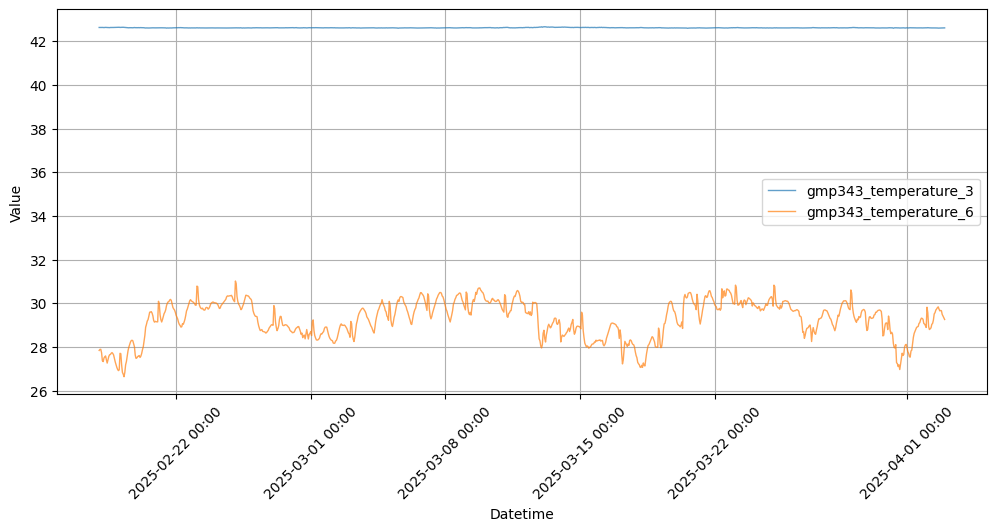

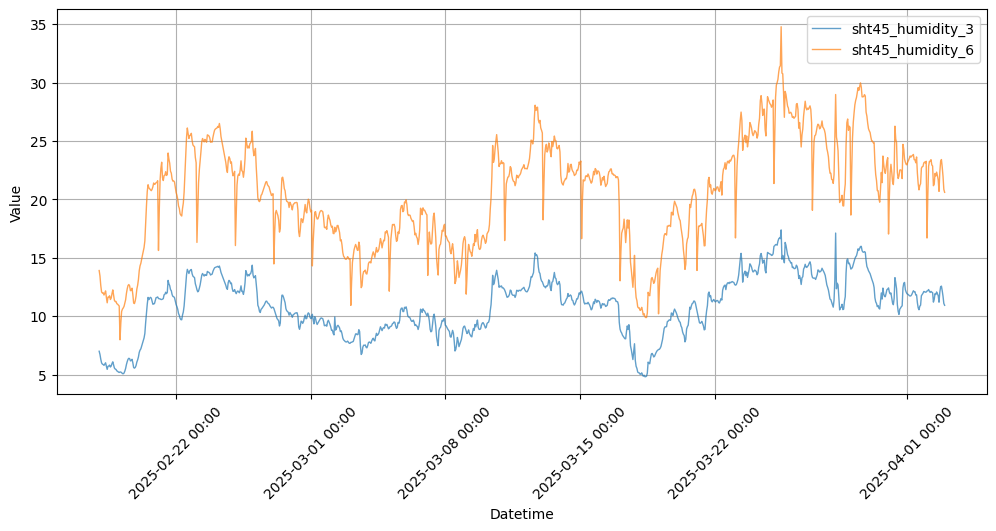

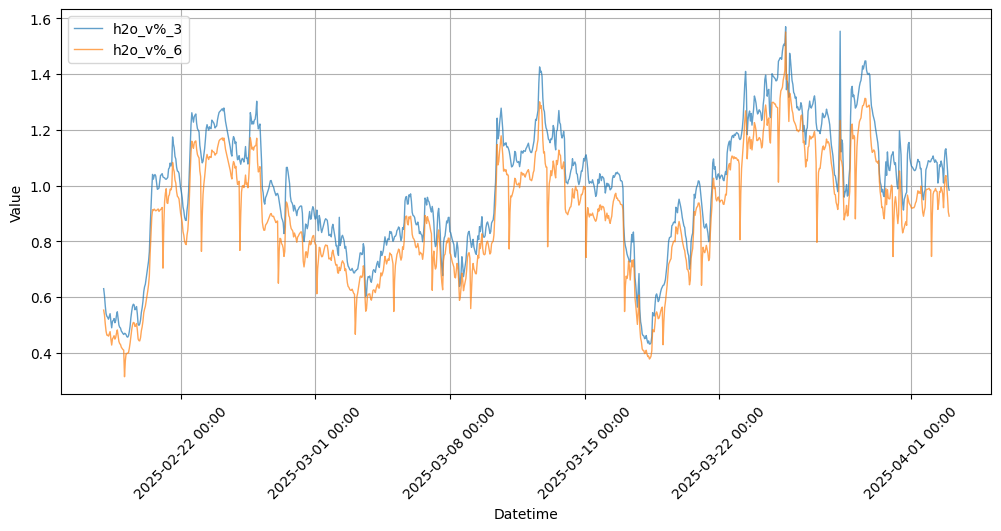

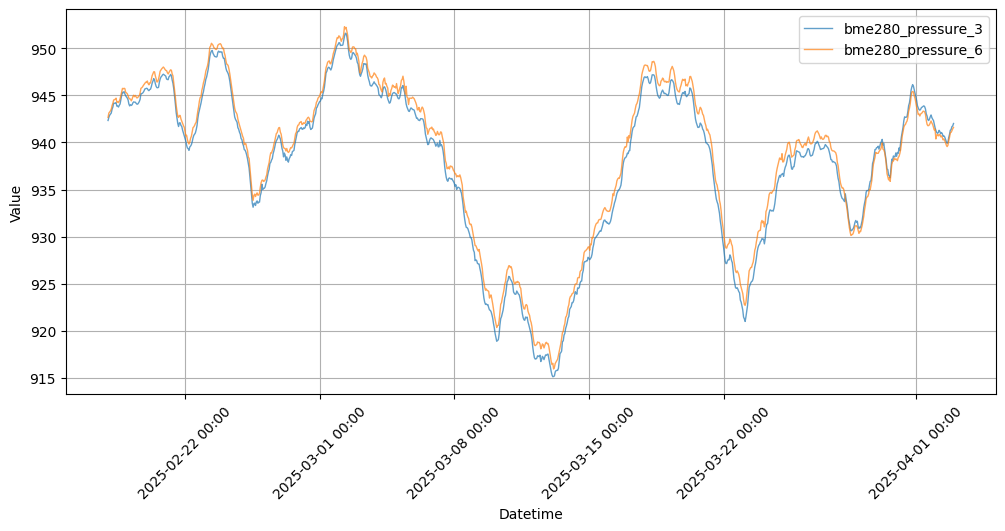

In [4]:
rename_dict = {col: col + "_3" for col in df_3.columns}

df_plot = df_3.join(df_6, on="datetime", how="inner", suffix="_6").rename(rename_dict).rename({"datetime_3": "datetime"})

plot_columns(df_plot, "datetime", ["gmp343_temperature_3", "gmp343_temperature_6"])
plot_columns(df_plot, "datetime", ["sht45_humidity_3", "sht45_humidity_6"])
plot_columns(df_plot, "datetime", ["h2o_v%_3", "h2o_v%_6"])
plot_columns(df_plot, "datetime", ["bme280_pressure_3", "bme280_pressure_6"])


# 🧪 Praktische Übung 2

In dieser Aufgabe wollen wir ein Gefühl dafür bekommen welche Werte unser Sensor im Feld ausgesetzt ist. Dafür Berechnen wir die maximale Variabilität und sehen uns die Werte für Min und für Max genauer an.

✅ Aufgabe:

- Emittle den maximalen und minimalen Wert für System 6 für die Parameter (Temperatur (°C), relative Luftfeuchtigkeit (%), absolute Luftfeuchtigkeit (v%), Druck (hPa))
- Ermittle dann die maximalen Variabilität (max - min) für die Parameter (Temperatur (°C), relative Luftfeuchtigkeit (%), absolute Luftfeuchtigkeit (v%), Druck (hPa))

### Nützliche Funktionen

- [Polars Transform: Dataframe -> Series](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.get_column.html#polars.DataFrame.get_column)
- [Polars DataFrame Aggregations](https://docs.pola.rs/api/python/dev/reference/dataframe/aggregation.html)

In [ ]:
# Zeigt euch die ersten 3 Zeilen des DataFrames df_6 an
df_6.head(3)

In [ ]:
# Column (Spalte): "gmp343_temperature"

In [ ]:
# Column (Spalte): "sht45_humidity"

In [ ]:
# Column (Spalte): "h2o_v%" 

In [ ]:
# Column (Spalte): "bme280_pressure"

---

# Scatter Plots: Performance von interner Kompensation 

Auch bei stabilen Systembedingungen und vorhandener interner Kompensation können Umwelteinflüsse weiterhin messbare Effekte auf die Genauigkeit der CO₂-Sensoren haben. In dieser Übung geht es darum, geeignete Werkzeuge zu identifizieren, mit denen sich diese Effekte sichtbar machen, analysieren und vergleichen lassen.

Ausgangslage
- Bisher habt ihr die Verteilung der stündlichen Mittelwerte der Differenz zum Referenzsystem betrachtet
- Zusätzlich habt ihr die Bandbreite atmosphärischer Bedingungen untersucht
- Nun kombinieren wir beide Aspekte in einem Scatter Plot und ergänzen diesen um eine lineare Regression, um systematische Trends zu identifizieren.

## Motivation

Scatter Plots sind ein zentrales Werkzeug zur Visualisierung von Zusammenhängen zwischen Einflussgröße und Messabweichung. Mit ihrer Hilfe lassen sich Trends, Korrelationen und individuelle Sensitivitäten der Sensoren schnell erfassen.

Diese Übung soll euch dabei unterstützen:

- Den Einsatz von Scatter Plots zur Analyse sensorischer Abweichungen zu verstehen
- Die konkreten Effekte von Druck, Temperatur und Luftfeuchtigkeit auf das Sensorsignal zu erkennen
- Nachzuvollziehen, wie unterschiedlich einzelne Sensoren auf Umwelteinflüsse reagieren

In [ ]:
plot_scatter_with_trendline(df_sbs_2024, "h2o_v%", "diff", 2, 2, "Absolute Humidity (vol%)", "System - Reference (ppm)","Scatter Plots: ΔCO2 vs Absolute Humidity")

In [ ]:
plot_scatter_with_trendline(df_sbs_2024, "bme280_pressure", "diff", 2, 2, "Pressure (hPa)", "System - Reference (ppm)","Scatter Plots: ΔCO2 vs Pressure" )

In [ ]:
plot_scatter_with_trendline(df_sbs_2024, "gmp343_temperature", "diff", 2, 2, "Temperature (°C)", "System - Reference (ppm)","Scatter Plots: ΔCO2 vs Temperature")

# 🧪 Praktische Übung 3 

Wir wollen nun den Scatterplot für die Temperatur genauer betrachten. Hierfür werten wir die Performance innerhalb und ausserhalb der Temperaturstabilisierung des Systems aus. 

### Technischer Hintergrund System (v1)  

In der Outdoor-Enclosure wird die Temperatur mittels einer Hysterese-Regelung (über Heizer und Lüfter) auf ±3°C stabilisiert. Das bedeutet, dass die Temperatur innerhalb eines Toleranzbereichs von 3°C um den Sollwert von 29°C gehalten wird. Bei starker Sonneneinstrahlung stößt dieses System jedoch an seine Grenzen, wodurch die Temperaturkontrolle nicht mehr möglich ist.
  
✅ Aufgabe:

- Filtere das DataFrame für Temperaturwerte größer und kleiner 32°C und wiederhole dann die Scatterplots

## Hilfreiche Funktionen

- [Polars Filter](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.filter.html#polars.DataFrame.filter)

In [ ]:
## Filtere die Temperaturwerte für < 32°C
df_plot = df_sbs_2024
##

plot_scatter_with_trendline(df_plot, "gmp343_temperature", "diff", 2, 2, "Temperature (°C)", "System - Reference (ppm)","Scatter Plots: ΔCO2 vs Temperature")

In [ ]:
## Filtere die Temperaturwerte für >= 32°C
df_plot = df_sbs_2024
##

plot_scatter_with_trendline(df_plot, "gmp343_temperature", "diff", 2, 2, "Temperature (°C)", "System - Reference (ppm)","Scatter Plots: ΔCO2 vs Temperature")

---

# Scatter Plot: Einfluss einer stabilisierten Temperaturregelung

In diesem Schritt untersuchen wir, wie sich eine präzisere Temperaturregelung auf die Sensitivität des Sensors gegenüber Temperaturschwankungen auswirkt. System 3 wurde dafür gezielt so aufgebaut, dass es Temperaturschwankungen besonders gut stabilisieren kann. Die Hypothese: Eine geringere Temperaturschwankung im Sensor führt zu einer höheren Messstabilität und geringerer Temperaturabhängigkeit.

⸻

## Technischer Hintergrund zu System 3 (v2)

System 3 verfügt über eine zweistufige Temperaturregelung:

- Eine äußere Klimabox hält die Umgebungstemperatur konstant.
- Zusätzlich ist der eigentliche Sensor in eine PID-geregelte Heat Box eingebettet, die direkt um den Sensor angeordnet ist.

Diese Konstruktion ermöglicht eine Temperaturstabilität von ±0,1 °C direkt am Sensor. Dadurch wird eine hochkonstante und reproduzierbare Messumgebung geschaffen, in der Temperatureffekte auf die CO₂-Messung deutlich schwächer wirken sollten.

In [ ]:
max_col, max_row = 2, 2

plot_scatter_with_trendline(df_sbs_2025, "h2o_v%", "diff", 2, 2, "Absolute Humidity (vol%)", "System - Reference (ppm)","Scatter Plots: ΔCO2 vs Absolute Humidity")
plot_scatter_with_trendline(df_sbs_2025, "bme280_pressure", "diff", 2, 2, "Pressure (hPa)", "System - Reference (ppm)","Scatter Plots: ΔCO2 vs Pressure" )
plot_scatter_with_trendline(df_sbs_2025, "gmp343_temperature", "diff", max_col, max_row, "Temperature (°C)", "System - Reference (ppm)","Scatter Plots: ΔCO2 vs Temperature")

 Fragen

- **Vergleich der Systeme:**  
  Vergleicht anhand von Scatter Plots, wie sich die Temperaturregelung der beiden Systeme (System 6 (v1) versus System 3 (v2)) auf die Messgenauigkeit auswirkt.  

- **Auswirkungen der Temperaturvariabilität:**  
  Diskutiert, inwiefern die präzise Temperaturstabilisierung in System 3 (v2) zu geringeren Schwankungen und damit zu einer besseren Messperformance führt, und wie sich dies im Vergleich zu den Ergebnissen von System 6 zeigt.

- **Weitere Lösungen zur Systemstabilisierung:**  
  Diskutiert, welche weiteren Lösungen euch zur Stabilisierung der Sensorsensibilität einfallen. Wie gut lässt sich eure Lösung in die Praxis umsetzen?